### Random Forest
The Random Forest algorithm will be used to predict on the Driver dataset. Looking at other kernels so far, I hypothesize that the Random Forest Classifier will not do as well as xgboost and catboost 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
#load training data
xtrain = pd.read_csv("train.csv")
ytrain = xtrain["target"]
idtrain = xtrain["id"]
xtrain.drop(["id", "target"], axis = 1, inplace = True)

#Load testing data 
xtest = pd.read_csv("test.csv")
xtest.drop("id", axis = 1, inplace = True)

In [3]:
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
#View importance
clf.feature_importances_

array([ 0.0247095 ,  0.01158632,  0.03193405,  0.00776918,  0.00965339,
        0.00392449,  0.00373603,  0.00399432,  0.00433875,  0.00018772,
        0.00031003,  0.00116174,  0.00020287,  0.00133993,  0.03226991,
        0.00524501,  0.00318463,  0.00460162,  0.02382609,  0.02874507,
        0.05239553,  0.02018586,  0.00458316,  0.00784497,  0.00645682,
        0.01073196,  0.02418585,  0.00472809,  0.00449736,  0.01218336,
        0.00148366,  0.03191705,  0.01097293,  0.02191834,  0.05865367,
        0.04005804,  0.02575694,  0.03098472,  0.03244934,  0.03100882,
        0.02332805,  0.02358471,  0.02576411,  0.02811385,  0.02846829,
        0.02550996,  0.03761606,  0.03563633,  0.0228984 ,  0.0296226 ,
        0.03717145,  0.00604207,  0.00853731,  0.00875629,  0.00821504,
        0.00847062,  0.00654774])

In [5]:
tt = {x:y for x,y in zip(xtrain.columns, clf.feature_importances_) if y >0.025}

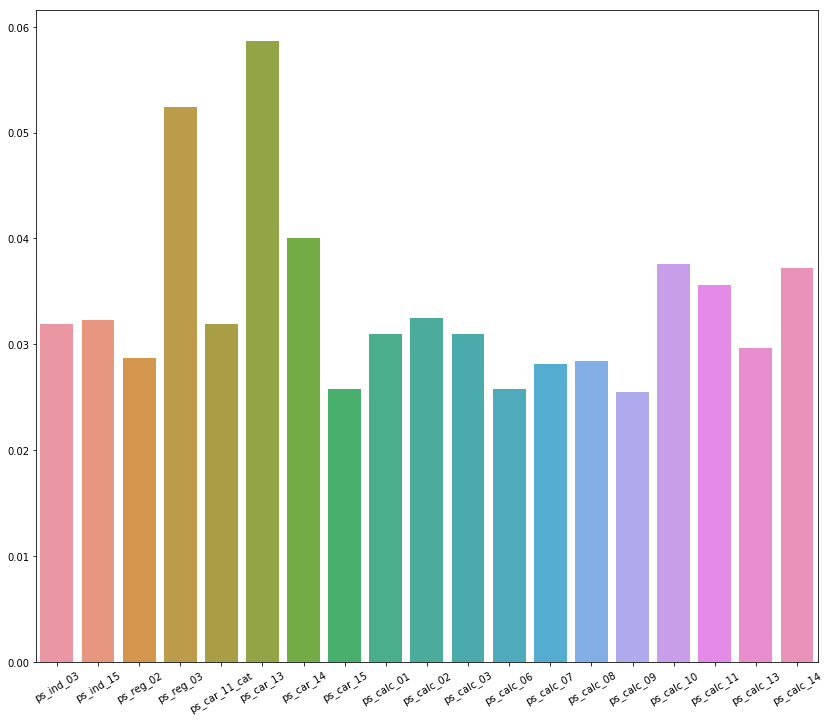

In [6]:
plt.figure(figsize=(14,12))
g = sns.barplot(x = [i for i in tt.keys()], y =[t for t in tt.values()] )
g.set_xticklabels(labels = tt.keys(), rotation=30)
plt.show()

In [7]:
preds = clf.predict(xtest)

In [ ]:
sns.distplot(preds)
plt.show()

The default values for the Random Forest Classifier predict only 0s for the target so now we focus on tuning the parameters

In [9]:
clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)